In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 读取数据

In [4]:
amazon_data = pdr.get_data_yahoo('AMZN')

In [5]:
amazon_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-15,527.919983,517.200012,523.250000,522.369995,2865900,522.369995
2015-09-16,528.299988,518.520020,521.979980,527.390015,2252800,527.390015
2015-09-17,546.969971,526.570007,526.979980,538.869995,4169500,538.869995
2015-09-18,546.239990,531.349976,534.619995,540.260010,6160100,540.260010
2015-09-21,549.780029,539.590027,544.330017,548.390015,3283300,548.390015


### 数据预处理

In [10]:
df = amazon_data['Open'].values

In [11]:
df

array([ 523.25      ,  521.97998047,  526.97998047, ..., 3202.98999023,
       3307.2199707 , 3208.68994141])

In [12]:
df = df.reshape(-1,1)

In [13]:
df

array([[ 523.25      ],
       [ 521.97998047],
       [ 526.97998047],
       ...,
       [3202.98999023],
       [3307.2199707 ],
       [3208.68994141]])

### 数据分析

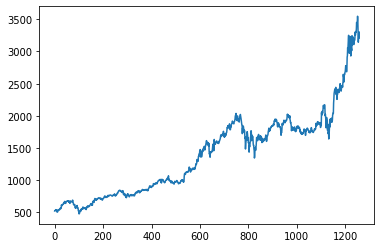

In [14]:
# 通过数据可视化的方式检验时间序列的平稳性
plt.plot(df)
plt.show()

该序列有明显的单调递增趋势，因此可以判断为非平稳序列

D:\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


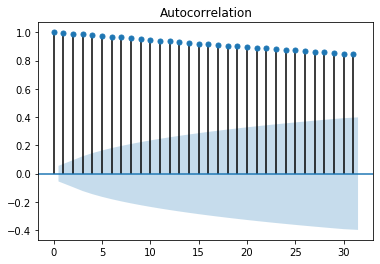

In [16]:
# 原始数据的自相关图
plot_acf(df).show()

D:\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


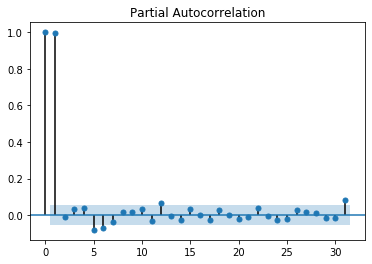

In [17]:
#原始数据的偏自相关图
plot_pacf(df).show()

In [18]:
#平稳性检测-ADF检验
from statsmodels.tsa.stattools import adfuller as ADF
ADF(df)
#目前这种方法还不知道具体如何使用，以及它做出判断的原理

(1.3986590792761961,
 0.9971080418018762,
 14,
 1243,
 {'1%': -3.435621806786881,
  '5%': -2.8638680226791444,
  '10%': -2.5680094689100477},
 12204.899983401972)

In [29]:
#差分处理
#对原始序列进行一阶差分处理，并进行平稳性检测
df_diff1 = np.diff(df,axis=0)

In [30]:
print(df_diff1)

[[ -1.27001953]
 [  5.        ]
 [  7.64001465]
 ...
 [ 58.98999023]
 [104.22998047]
 [-98.5300293 ]]


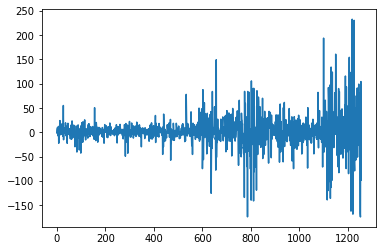

In [31]:
plt.plot(df_diff1)
plt.show()

D:\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


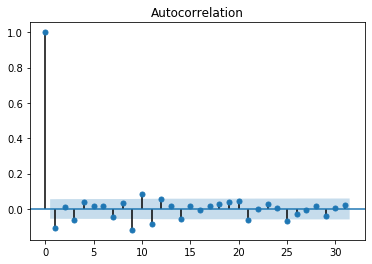

In [33]:
plot_acf(df_diff1).show()

D:\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


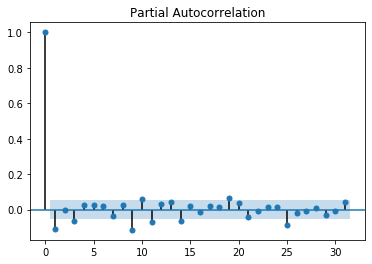

In [34]:
plot_pacf(df_diff1).show()

In [35]:
ADF(df_diff1)

(-10.040280036710296,
 1.5026304859549143e-17,
 13,
 1243,
 {'1%': -3.435621806786881,
  '5%': -2.8638680226791444,
  '10%': -2.5680094689100477},
 12196.05108042011)

结果显示，一阶差分之后序列的时序图在均值附近较为平稳的波动，自相关图具有较强的短期波动性，所以经过一阶差分之后的序列是平稳序列

In [36]:
# 相对最优模型识别：计算ARMA模型的AIC或者BIC
# AIC赤池信息准侧
# BIC贝叶斯信息准侧
from statsmodels.tsa.arima_model import ARIMA

p_max = 10
q_max = 10
aic_matrix = []
for p in range(p_max+1):
    tmp = []
    for q in range(q_max+1):
        try:
            arima = ARIMA(df,(p,1,q)).fit()
            tmp.append(arima.aic)
        except:
            tmp.append(None)
    aic_matrix.append(tmp)

    

D:\conda\envs\py36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\conda\envs\py36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\conda\envs\py36\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\conda\envs\py36\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\conda\envs\py36\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\conda\envs\py36\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarni

In [39]:
aic_matrix = pd.DataFrame(aic_matrix) 

In [44]:
aic_matrix

,0,1,2,3,4,5,6,7,8,9,10
0,12445.837584,12432.986726,12434.974225,12432.894899,12433.113483,12434.300533,12436.287189,12436.713796,12438.713644,12427.961601,12419.356824
1,12433.075457,12434.915814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12435.069335,12436.181123,12427.849475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12431.831836,12433.401112,12434.744167,12420.983892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12433.150381,12434.664606,12427.052799,12420.341047,12424.223796,NaN,NaN,NaN,NaN,NaN,NaN
5,12434.390133,12436.275730,12427.648540,12422.152166,12417.299245,12419.619793,NaN,NaN,NaN,NaN,NaN
6,12435.925074,12427.245530,12409.120556,12434.625866,12432.776784,12414.089934,12427.398992,NaN,NaN,NaN,NaN
7,12435.962041,12426.297586,12428.434865,12412.392720,12410.721616,12406.840403,12412.534403,12405.074512,NaN,NaN,NaN
8,12437.065618,12425.839437,12429.753943,12414.165675,12406.078653,12407.986794,12410.824578,12416.206810,NaN,NaN,NaN
9,12422.066000,12416.738845,12412.776895,12413.042904,12406.034705,12406.764051,12408.763726,12403.991179,12401.186402,12400.895220,NaN


In [45]:
#使用stack将数据展平
aic_matrix.stack()

0   0     12445.837584
    1     12432.986726
    2     12434.974225
    3     12432.894899
    4     12433.113483
              ...     
10  6     12410.759867
    7     12411.159911
    8     12402.862210
    9     12403.940393
    10    12410.098100
Length: 75, dtype: float64

In [46]:
#使用idxmin找出最小值位置
p,q = aic_matrix.stack().idxmin()

In [47]:
#将最小值的位置打印出来
print(p,q)

9 9


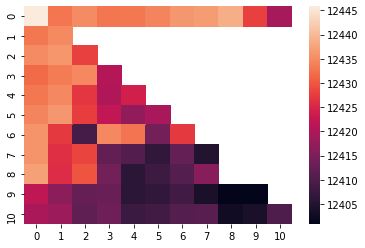

In [48]:
import seaborn as sns
sns.heatmap(aic_matrix)

Text(0.5, 1, 'AIC')

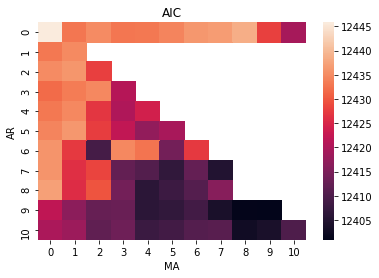

In [60]:
sns.heatmap(aic_matrix)
plt.ylabel('AR')
plt.xlabel('MA')
plt.title('AIC')

从热力图也可以看出来大约是(9,9)时，AIC的值最小。

### 模型建立与模型评估

In [62]:
#根据上面的分析结果，我们建立d=1,p=9,q=9的ARIMA模型
model = ARIMA(df,(9,1,9)).fit()

D:\conda\envs\py36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\conda\envs\py36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [74]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 12503.6249
Dependent Variable: D.y              Log-Likelihood:      -6180.4   
Date:               2020-09-14 17:09 Scale:               1.0000    
No. Observations:   1257             Method:              css-mle   
Df Model:           19               Sample:              1         
Df Residuals:       1238                                  8         
Converged:          0.0000           S.D. of innovations: 32.975    
No. Iterations:     500.0000         HQIC:                12439.504 
AIC:                12400.8952                                      
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         2.1584     0.8197    2.6330   0.0085    0.5517    3.7650
ar.L1.D.y     0.2175     0.0836    2.6028   0.0092    0.0537    0.3812
ar.L2.D.y     0.1901     0.0916    2.0755   0.0379    0.0106    0.3697
ar.L3.D.y    -0.3005     0.0525   -5.7185   0.0000   -0.4034   -0.1975
ar.L4.D.y     0.2454     0.0475    5.1617   0.0000    0.1522    0.3385
ar.L5.D.y     0.0234     0.0568    0.4109   0.6811   -0.0880    0.1348
ar.L6.D.y    -0.3303     0.0565   -5.8451   0.0000   -0.4411   -0.2195
ar.L7.D.y     0.4279     0.0510    8.3881   0.0000    0.3279    0.5279
ar.L8.D.y    -0.2281     0.0802   -2.8460   0.0044   -0.3852   -0.0710
ar.L9.D.y    -0.6910     0.0730   -9.4599   0.0000   -0.8342   -0.5479
ma.L1.D.y    -0.3103     0.0938   -3.3069   0.0009   -0.4942   -0.1264
ma.L2.D.y    -0.1546     0.1071   -1.4444   0.1486   -0.3645    0.0552
ma.L3.D.y     0.2691     0.0528    5.0965   0.0000    0.1656    0.3725
ma.L4.D.y    -0.2690     0.0518   -5.1980   0.0000   -0.3704   -0.1676
ma.L5.D.y     0.0403     0.0597    0.6742   0.5002   -0.0768    0.1574
ma.L6.D.y     0.3486     0.0580    6.0152   0.0000    0.2350    0.4622
ma.L7.D.y    -0.5523     0.0554   -9.9750   0.0000   -0.6609   -0.4438
ma.L8.D.y     0.3321     0.1000    3.3209   0.0009    0.1361    0.5281
ma.L9.D.y     0.5701     0.0871    6.5469   0.0000    0.3994    0.7407
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            0.9483            -0.3280           1.0034            -0.0530
AR.2            0.9483             0.3280           1.0034             0.0530
AR.3            0.5415            -0.8620           1.0180            -0.1607
AR.4            0.5415             0.8620           1.0180             0.1607
AR.5           -0.1229            -0.9993           1.0068            -0.2695
AR.6           -0.1229             0.9993           1.0068             0.2695
AR.7           -0.9346            -0.5215           1.0702            -0.4190
AR.8           -0.9346             0.5215           1.0702             0.4190
AR.9           -1.1947            -0.0000           1.1947            -0.5000
MA.1            0.9538            -0.3239           1.0073            -0.0521
MA.2            0.9538             0.3239           1.0073             0.0521
MA.3            0.5594            -0.8613           1.0271            -0.1583
MA.4            0.5594             0.8613           1.0271             0.1583
MA.5           -0.1278            -0.9919           1.0001            -0.2704
MA.6           -0.1278             0.9919           1.0001             0.2704
MA.7           -0.9546            -0.4728           1.0653            -0.4268
MA.8           -0.9546             0.4728           1.0653             0.4268
MA.9           -1.4441            -0.0000           1.4441            -0.5000
===================

In [70]:
#这里要注意ARIMA与ARMA使用的函数是不同的
model.forecast(5)[0]

array([3210.87419873, 3197.25336225, 3203.52617475, 3218.052826  ,
       3373.76494531])